<a href="https://colab.research.google.com/github/EUNYUGNYU/SocialTextAnalysis_exmple_03/blob/main/SocialTextAnalysis_class03_wordcloud%26topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SocialTextAnalysis Introduction
---
<br>

### 3강 범위

**워드클라우드**
* 기본 워드클라우드
* 전처리 후 워드클라우드
* mask, 색상변경 워드클라우드

**토픽모델링**
* LDA 토픽모델링
* gensim 시각화
* 토픽별 워드클라우드 활용

---
*SocialTextAnalysis_class03_wordcloud&topics.ipynb*
- e-mail: elin21@yonsei.ac.kr


# 1. **워드클라우드**

다량의 텍스트에서 얻어진 키워드들 분석하여 **중요도** 등을 고려하여 **시각적**으로 표시하는 것
* 핵심어일수록 큰 글씨로 표현되며, 어떤 내용들이 있는지 한 눈에 볼 수 있음

## **Packages & Modules**

* 필요 라이브러리 설치

In [2]:
 !pip install word cloud # 워드클라우드
 !pip install matplotlib # 시각화

ERROR: Could not find a version that satisfies the requirement word (from versions: none)
ERROR: No matching distribution found for word


* 분석에 필요한 라이브러리 & 모듈호출

In [3]:
import pandas as pd
from tqdm import tqdm # 진행상황 알기
tqdm.pandas()

from wordcloud import WordCloud,STOPWORDS
from matplotlib import pyplot as plt
from matplotlib import cm as colormap
from collections import Counter # 단어 빈도수 계산

## **Load Data**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
review = pd.read_csv('/content/drive/MyDrive/B2C 리뷰그룹/SocialTextAnalysis_3강/data/nsmc_ratings.txt', sep='\t')

In [6]:
display(review.info())
display(review.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        200000 non-null  int64 
 1   document  199992 non-null  object
 2   label     200000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


None

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


## **Word Cloud**

> **기본 워드클라우드**

전처리하기 전이다.

In [7]:
! pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 42.9 MB/s 
     |████████████████████████████████| 86 kB 4.9 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [8]:
# 워드클라우드는 키워드 기반이므로, 각 document는 토큰화처리가 되어있어야 함
from konlpy.tag import Komoran
komoran = Komoran()

reviews = review[review['document'].notna()].copy() # document 공백있는 경우 행 삭제
reviews['tokens'] = reviews['document'].progress_apply(lambda x : komoran.morphs(x)) # 형태소 단위로 텍스트 분리
reviews.head()

100%|██████████| 199992/199992 [02:43<00:00, 1222.26it/s]


,id,document,label,tokens
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1,"[어리, ㄹ, 때, 보고, 지금, 다시, 보, 아도, 재밌어요ㅋㅋ]"
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1,"[디자인, 을, 배우, 는, 학생, 으로, ,, 외국, 디자이너, 와, 그, 들, ..."
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1,"[폴리스, 스토리, 시리즈, 는, 1, 부터, 뉴, 까지, 버리, ㄹ께, 하나, 도..."
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1,"[오, 아, ., ., 연기, 가, 진짜, 개, 쩌, ㄹ, 구나, .., 지루, 하..."
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1,"[안개, 자욱, 하, ㄴ, 밤하늘, 에, 뜨, 어, 있, 는, 초승달, 같, 은, ..."


In [9]:
# 각 document에 나오는 tokens 합치기
all_tokens = []
reviews['tokens'].apply(lambda x : all_tokens.extend(set(x))) # 각 document의 tokens 중복x
c = Counter(all_tokens)

display(all_tokens[:20])
display(c)

['때',
 '다시',
 '보',
 'ㄹ',
 '보고',
 '어리',
 '재밌어요ㅋㅋ',
 '아도',
 '지금',
 '통하',
 '시절',
 '것',
 '가',
 '은',
 '우리나라',
 '문화',
 '도',
 '있',
 '는데',
 '산업']

Counter({'때': 6464,
         '다시': 3895,
         '보': 48650,
         'ㄹ': 28274,
         '보고': 1832,
         '어리': 1819,
         '재밌어요ㅋㅋ': 2,
         '아도': 4343,
         '지금': 2992,
         '통하': 404,
         '시절': 762,
         '것': 12623,
         '가': 35589,
         '은': 33446,
         '우리나라': 859,
         '문화': 278,
         '도': 30899,
         '있': 18817,
         '는데': 14557,
         '산업': 25,
         '나가': 697,
         '지키': 226,
         '에서': 9898,
         'ㅂ니다': 7417,
         '었': 28132,
         '는': 62491,
         '같': 10074,
         '부럽': 148,
         '학생': 176,
         '으로': 11181,
         '꿈': 516,
         '노': 1362,
         '에': 35939,
         '와': 5904,
         '하': 80131,
         '꾸': 160,
         '이': 83079,
         '들': 23614,
         '아': 23241,
         '외국': 185,
         '디자이너': 16,
         '어렵': 597,
         '그': 7011,
         '끝': 2658,
         '까지': 5666,
         '저': 2299,
         '전통': 34,
         '발전': 199,
         '을

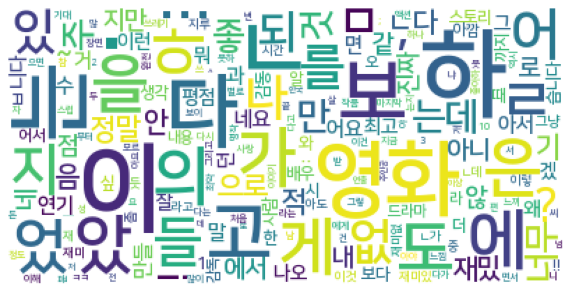

In [10]:
# 워드클라우드 생성
fig = plt.figure(figsize = (10,10))

wc = WordCloud(
               font_path = '/content/drive/MyDrive/B2C 리뷰그룹/SocialTextAnalysis_3강/NanumSquare.ttf', # 글꼴 지정 (경로지정)
               background_color = 'white' ,  # 배경색상 지정
               stopwords = STOPWORDS, # wordcloud에서 제공되는 stopwords는 영어기반이므로 결국 한국어분석 시 불용어 제거 필요
               max_font_size = 70 # 고빈도 단어 글자크기
              )
cloud = wc.generate_from_frequencies(c)     

plt.axis('off') # 축 삭제
plt.imshow(cloud);

In [11]:
# STOPWORDS

> **전처리 후 워드클라우드**
* 워드클라우드에서 제공되는 stopwords(불용어)는 영어기반이므로 한국어는 전처리과정이 선행되어야 함
* 목적에 따라 보고싶은 품사를 지정하거나, 모든 토큰을 사용하지만 일반적으로는 명사를 주로 사용

In [12]:
# 모든 토큰화가 아닌 명사만 태깅
reviews['nouns'] = reviews['document'].progress_apply(lambda x : komoran.nouns(x)) # 형태소 분리하여, 명사에 해당하는 것만 반환 (morphs = 그냥 형태소)
reviews.head()

100%|██████████| 199992/199992 [03:07<00:00, 1066.11it/s]


,id,document,label,tokens,nouns
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1,"[어리, ㄹ, 때, 보고, 지금, 다시, 보, 아도, 재밌어요ㅋㅋ]",[때]
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1,"[디자인, 을, 배우, 는, 학생, 으로, ,, 외국, 디자이너, 와, 그, 들, ...","[디자인, 학생, 외국, 디자이너, 전통, 발전, 문화, 산업, 사실, 우리나라, ..."
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1,"[폴리스, 스토리, 시리즈, 는, 1, 부터, 뉴, 까지, 버리, ㄹ께, 하나, 도...","[폴리스, 스토리, 시리즈, 뉴, 최고]"
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1,"[오, 아, ., ., 연기, 가, 진짜, 개, 쩌, ㄹ, 구나, .., 지루, 하...","[연기, 것, 라고, 생각, 몰입, 영, 화지]"
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1,"[안개, 자욱, 하, ㄴ, 밤하늘, 에, 뜨, 어, 있, 는, 초승달, 같, 은, ...","[안개, 밤하늘, 초승달, 영화]"


In [13]:
# 불용어 파일 load
with open('/content/drive/MyDrive/B2C 리뷰그룹/SocialTextAnalysis_3강/data/korean_stopwords.txt', encoding='utf-8') as fin:
    stopwords = fin.read().split('\n')

stopwords = stopwords + [] # 추가하고 싶은 불용어 추가    
stopwords = set(stopwords) # 중복 불용어 제거
print(stopwords)

{'', '가', '그러한즉', '의해', '할수있다', '놓', '즉', '또', '각종', '어째서', '저것만큼', '둘', '가지', '해요', '어기여차', '삐걱', '함으로써', '내', '바로', '조금', '구', '이용하여', '부류의', '그리고', '보', '하는', '보아', '것과', '몰랏다', '과', '설사', '잇따라', '쿵', '타인', '모두', '좀', '대해', '아니', '하는것도', '이르다', '따름이다', '딱', '소인', '도달하다', '해도된다', '이로', '편이', '가서', '만약에', '이젠', '두', '번', '말', '앞', '말하면', '하기에', '우리들', '아홉', '딩동', '고려하면', '일', '때', '하는것이', '중의하나', '경우', '으로서', '그래서', '그렇지않으면', '그럼에도', '다소', '즈음하여', '토하다', '이렇게말하자면', '갖고말하자면', '안다', '씨', '기대여', '뿐만아니라', '오', '외에', '본대로', '예하면', '이와같다면', '보면', '어떻해', '안', '하고', '참나', '팔', '요컨대', '상대적으로', '비길수', '하물며', '알', '하기는한데', '몇', '인젠', '다만', '여차', '삐걱거리다', '그러므로', '사', '첫번째로', '정도', '네', '칠', '이외에도', '각각', '들면', '어디', '아이고', '그에', '제', '여보시오', '쉿', '말하', '솨', '비추어', '까지도', '하나', '알았어', '그만이다', '그때', '같', '지말고', '주룩주룩', '제외하고', '얼마', '시키', '휘익', '하다', '시키다', '구토하다', '하면서', '어떤것들', '어떻게', '틀림없다', '어느해', '아니라면', '남들', '아이쿠', '무릎쓰고', '오자마자', '잠깐', '함께', '헐떡헐떡', '등등', '놀라다', '된바에야', '같다', '점에서', '나머지는'

In [14]:
# 불용어 제거
reviews['nouns_revised'] = reviews['nouns'].progress_apply(lambda x : [noun for noun in x if noun not in stopwords])
reviews.head()

100%|██████████| 199992/199992 [00:01<00:00, 199123.26it/s]


,id,document,label,tokens,nouns,nouns_revised
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1,"[어리, ㄹ, 때, 보고, 지금, 다시, 보, 아도, 재밌어요ㅋㅋ]",[때],[]
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1,"[디자인, 을, 배우, 는, 학생, 으로, ,, 외국, 디자이너, 와, 그, 들, ...","[디자인, 학생, 외국, 디자이너, 전통, 발전, 문화, 산업, 사실, 우리나라, ...","[디자인, 학생, 외국, 디자이너, 전통, 발전, 문화, 산업, 우리나라, 시절, ..."
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1,"[폴리스, 스토리, 시리즈, 는, 1, 부터, 뉴, 까지, 버리, ㄹ께, 하나, 도...","[폴리스, 스토리, 시리즈, 뉴, 최고]","[폴리스, 스토리, 시리즈, 뉴, 최고]"
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1,"[오, 아, ., ., 연기, 가, 진짜, 개, 쩌, ㄹ, 구나, .., 지루, 하...","[연기, 것, 라고, 생각, 몰입, 영, 화지]","[연기, 라고, 몰입, 화지]"
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1,"[안개, 자욱, 하, ㄴ, 밤하늘, 에, 뜨, 어, 있, 는, 초승달, 같, 은, ...","[안개, 밤하늘, 초승달, 영화]","[안개, 밤하늘, 초승달, 영화]"


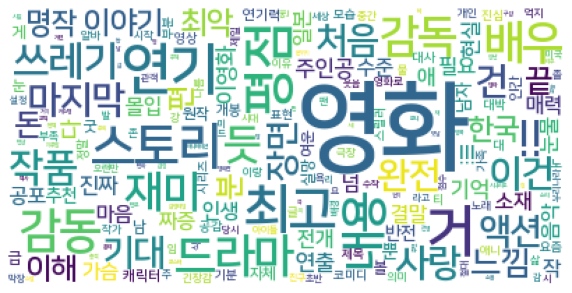

In [15]:
# 각 document에 나오는 tokens 합치기
all_nouns = []
reviews['nouns_revised'].apply(lambda x : all_nouns.extend(set(x))) # 각 document의 tokens 중복x
c = Counter(all_nouns)


# 워드클라우드 생성
fig = plt.figure(figsize = (10,10))

wc = WordCloud(
               font_path = '/content/drive/MyDrive/B2C 리뷰그룹/SocialTextAnalysis_3강/NanumSquare.ttf', # 글꼴 지정
               background_color = 'white' ,  # 배경색상 지정
               stopwords = stopwords,
               max_font_size = 70 # 고빈도 단어 글자크기
              )
cloud = wc.generate_from_frequencies(c)     

plt.axis('off') # 축 삭제
plt.imshow(cloud);

> mask & 색상변경 워드클라우드
* rgb 값이 0~255로 변환되었을 때, 0(검정색)부분에 mask가 씌워짐
* color chart 참고링크(https://matplotlib.org/stable/tutorials/colors/colormaps.html)

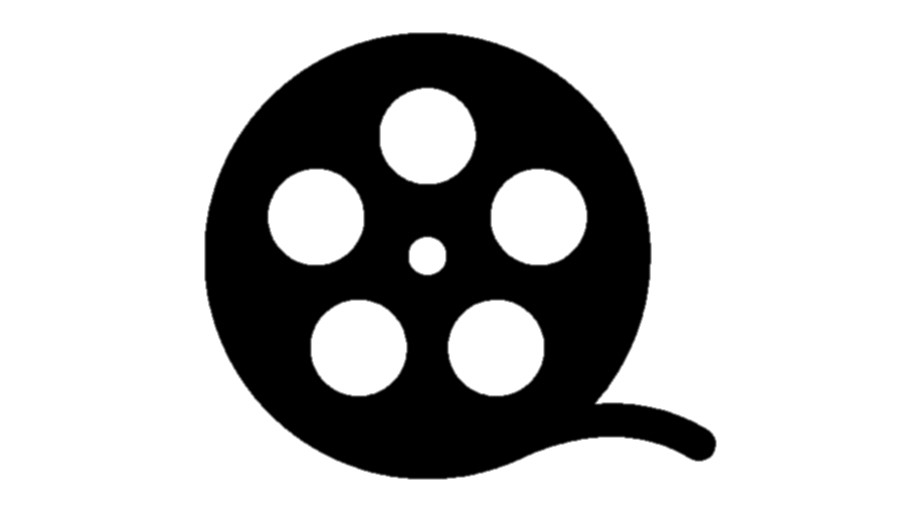

In [16]:
# mask 씌울 이미지 파일 불러오기
from PIL import Image
import numpy as np
mask = np.array(Image.open('/content/drive/MyDrive/B2C 리뷰그룹/SocialTextAnalysis_3강/data/movie_icon.jpg')) #0~255사이 값으로 변경
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

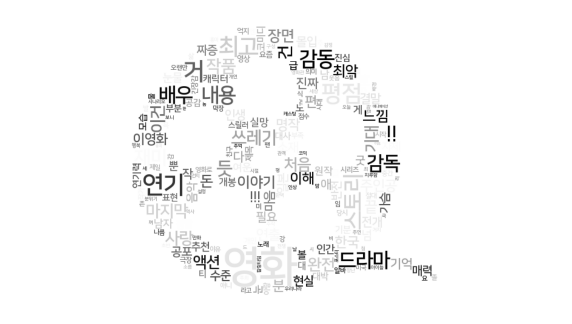

In [17]:
# 워드클라우드 생성
fig = plt.figure(figsize = (10,10))

wc = WordCloud(
               font_path = '/content/drive/MyDrive/B2C 리뷰그룹/SocialTextAnalysis_3강/NanumSquare.ttf', # 글꼴 지정
               background_color = 'white' ,  # 배경색상 지정
               stopwords = STOPWORDS,
               max_font_size = 70, # 고빈도 단어 글자크기
               mask = mask, #마스크 생성
               colormap = colormap.Greys # 색상지정
              )
cloud = wc.generate_from_frequencies(c)     

plt.axis('off') # 축 삭제
plt.imshow(cloud);

# 2. **Topic Modeling** 
### LDA(Latent Dirichlet Allocation : 잠재디리클레할당)

* **키워드를 기반**으로 각 document의 숨겨진 **주제**를 찾아줌
* LDA의 중요가정 : 각 문서들은 하나의 주제를 가지는게 아니라, **여러주제로 구성**되어 있으며 토픽들은 확률 분포에 기반해 단어를 생성한다.

#### __예시__

* **문서1** : 저는 사과랑 바나나를 먹어요
* **문서2** : 우리는 귀여운 강아지가 좋아요
* **문서3** : 저의 깜찍하고 귀여운 강아지가 바나나를 먹어요

<LDA로 계산된 각 문서의 토픽분포>
* **문서1** : 토픽 A일 가능성 100%
* **문서2** : 토픽 B 100%
* **문서3** : 토픽 B 60% , 토픽 A 40%

<각 토픽의 단어 분포>
* **토픽A** : 사과 20%, 바나나 40%, 먹어요 40%, 귀여운 0%, 강아지 0%, 깜찍하고 0%, 좋아요 0%
* **토픽B** : 사과 0%, 바나나 0%, 먹어요 0%, 귀여운 33%, 강아지 33%, 깜찍하고 16%, 좋아요 16%

#### __LDA 수행과정__

* **원하는 토픽의 개수 k 지정** \
    -> LDA 알고리즘은 k개의 토픽이 전체 문서에 분포되어 있다고 가정하게 됨
    
* **모든 단어를 k개 중 하나의 토픽에 할당** 

* **모든 문서의 모든 단어에 대해서 아래의 사항을 반복 진행 (iterative)**

* **어떤 문서의 각 단어 w는 자신은 잘못된 토픽에 할당되어져 있지만, 다른 단어들은 전부 올바른 토픽에 할당되어져 있는 상태라고 가정함.  \
이에 따라 단어 w는 아래의 두 가지 기준에 따라서 토픽이 재할당**
    * p(topic t | document d) : 문서 d의 단어들 중 토픽 t에 해당하는 단어들의 비율
    * p(word w | topic t) : 각 토픽들 t에서 해당 단어 w의 분포

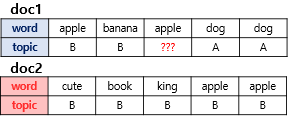

*__단어 W = apple인 경우__*

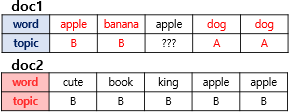

*__p(topic t | document d) : 문서 d의 단어들 중 토픽 t에 해당하는 단어들의 비율 계산__* \
p(topic A | document 1) : 문서 1의 단어들 중 토픽 A에 해당하는 단어들의 비율 = 2/4 = 0.5 \
p(topic B | document 1) : 문서 1의 단어들 중 토픽 B에 해당하는 단어들의 비율 = 2/4 = 0.5 \
-> doc1의 모든 단어들이 토픽 A, 토픽 B에 5:5의 비율로 할당되어 있으므로 단어 apple은 둘 중 어디에도 속할 가능성 존재

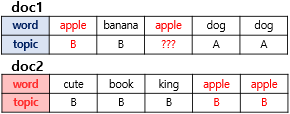

*__p(word w | topic t) : 각 토픽들 t에서 해당 단어 w의 분포 계산__* \
p(word apple | topic A) : 토픽 A에서 해당 단어 apple의 분포 계산 = 0/2 = 0 \
p(word apple | topic B) : 토픽 B에서 해당 단어 apple의 분포 계산 = 3/6 = 0.5 \
-> **따라서 word apple은 topic B에 할당**
<br><br>
즉, LDA (잠재 디리클레 할당) : 단어가 특정 토픽에 존재할 확률과 문서에 특정 토픽이 존재할 확률을 결합확률로 추정하여 토픽을 추출한다.

## __Load Data__

In [18]:
# 전처리 완료된 파일 불러오기
data = pd.read_csv('/content/drive/MyDrive/B2C 리뷰그룹/SocialTextAnalysis_3강/data/naver_cafe.csv')
data.head()

,notice,board,title,date,view_count,like_count,comment_count,nick_name,nick_level,content,comments,title+content,tit&con_len,tokens,nouns
0,NaN,현대 아이오닉5,견적 계산기 만들어 봤습니다.,2021-04-16 08:36:00,3823.0,38.0,89,우주정복I레이EVI용인,준회원,첨부파일가격 계산.xlsx파일 다운로드내 컴퓨터 저장네이버 MYBOX에 저장 옵션 ...,좋은정보 감사합니다|옵션가격도 할인이 되는군요|네 옵션도 개소세가 적용된 가격 입니...,견적 계산기 만들어 봤습니다._첨부파일가격 계산.XLSX파일 다운로드내 컴퓨터 저장...,247,"['견적', '계산기', '만들어', '봤습니다', '첨부파일', '가격', '계산...","['견적', '계산기', '첨부파일', '가격', '계산', '파일', '다운로드'..."
1,NaN,현대 아이오닉5,실내 v2l말입니다,2021-08-22 23:47:00,147.0,0.0,3,난당근I아이오닉I서울,준회원,주행하면서 쓸수있나요 주행하면서 2열에서 드라이기를 쓴다던가 220냉장고를 ...,주행중 가능합니다~|항상 2열 아래에 차량용 냉장고 가지고 주행중 켜고 다녀요 \n...,실내 V2L말입니다_주행하면서 쓸수있나요 주행하면서 2열에서 드라이기를 쓴다...,85,"['실내', 'V2L', '주행', '쓸수있나요', '주행', '드라이기', '쓴다...","['실내', 'V2L', '주행', '주행', '드라이기', '냉장고', '가미',..."
2,NaN,현대 아이오닉5,에어백 경고등 점검 확인 조치하는게 어렵나요?,2021-08-22 23:05:00,58.0,0.0,2,랄라라I오닉5I경기,준회원,도장 불량 문제로 블루핸즈 지방 서비스에서 문짝탈거후 그 이후에 에어백 경고 등이 ...,에어백 경고등 같은경우는 에러 삭제해서 되는게 있고 안되는게 있는 부분이라..\n음...,에어백 경고등 점검 확인 조치하는게 어렵나요?_도장 불량 문제로 블루핸즈 지방 서비...,1131,"['에어백', '경고', '점검', '확인', '치하', '어렵나요', '?_', ...","['에어백', '경고', '점검', '확인', '치하', '도장', '불량', '문..."
3,NaN,현대 아이오닉5,아이오닉5 주차 시 사이드미러 하향 어떻게 하나요?,2021-08-22 21:42:00,257.0,0.0,2,라디오20I오닉l경기,준회원,예전에 되다가 요즘주차할때 사이드미러가 하향이 자동으로 안되서요주차라인 안보여 불편...,"미러 조정하는 레버가 가운데 있으면 안되구요, 오른쪽이나 왼쪽으로 넘어가 있어야 내...",아이오닉5 주차 시 사이드미러 하향 어떻게 하나요?_예전에 되다가 요즘주차할때 사이...,87,"['아이오닉5', '주차', '사이드미러', '하향', '?_', '예전', '요즘...","['아이오닉5', '주차', '사이드미러', '하향', '예전', '요즘', '주차..."
4,NaN,현대 아이오닉5,파워큐브로 100 충전,2021-08-22 19:00:00,310.0,1.0,6,영인IM3L오닉5I충북,준회원,세번째 파워큐브로 100 충전2w이라 계속 충전하면늘어날꺼같네요,파워큐브로 해보적이없는데... 시간은 얼마정도걸리나요?|엄청걸립니다…경주하로 예약해...,파워큐브로 100 충전_세번째 파워큐브로 100 충전2W이라 계속 충전하면늘어날꺼같네요,48,"['파워큐브', '충전', '세번', '파워큐브', '충전', '계속', '전하',...","['파워큐브', '충전', '세번', '파워큐브', '충전', '계속', '전하']"


In [19]:
data['nouns']=data['nouns'].str.replace('[','').str.replace(']','').str.replace('\'','')
data['nouns']=data['nouns'].apply(lambda x:x.split(','))
data['nouns']=data['nouns'].apply(lambda x:[i.strip() for i in x]) # 공백은 empty 값으로 변경(공백으로 시작(^)하고, 한칸 이상(+)은 삭제)
data['nouns'].head(2)

0    [견적, 계산기, 첨부파일, 가격, 계산, 파일, 다운로드, 컴퓨터, 저장, 네이버...
1    [실내, V2L, 주행, 주행, 드라이기, 냉장고, 가미, 전자레인지, 린다, 가능...
Name: nouns, dtype: object

## __LDA 토픽모델링__

In [20]:
# gensim 패키지 설치필요
!pip install gensim

In [21]:
import gensim
from gensim import corpora , models

In [22]:
dictionary = corpora.Dictionary(data['nouns'])
dictionary.filter_extremes(no_below=10, no_above=0.9)   
                        # 10개의 문서 미만으로 등장하는 단어는 제외, 전체의 90% 이상으로 자주 등장하는 단어는 제외
corpus = [dictionary.doc2bow(text) for text in data['nouns']]
print(corpus[0])

[(0, 3), (1, 1), (2, 2), (3, 2), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 2), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1)]


In [23]:
print(dictionary[66])

상태


* 적정토픽 수 찾기

In [24]:
# Compute Coherence Score
from gensim.models.callbacks import CoherenceMetric 
from gensim.models.coherencemodel import CoherenceModel
import logging


def compute_values(dictionary,corpus,texts,limit,start=2,step=3):
    '''
    - coherence_score
    의미 : 토픽이 얼마나 의미론적으로 일관성 있는지 판단. 높을수록 의미론적 일관성 높음
    주 용도 : 해당 모델이 얼마나 실제로 의미 있는 결과를 내는지 확인

    '''
    coherence_values=[]
    model_list=[]
    for num_topics in tqdm(range(start,limit,step)):
        model=gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,num_topics=num_topics, passes=30, iterations=1000)
        model_list.append(model)
        coherencemodel= CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list,coherence_values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
100%|██████████| 3/3 [16:08<00:00, 322.96s/it]


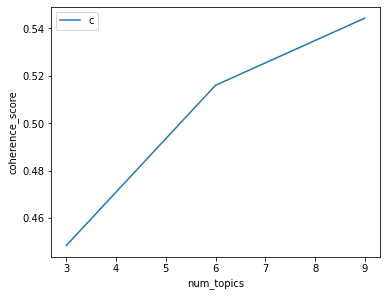

In [25]:
## coherence score확인
limit=10
start=3
step=3 # 3개씩 topic수 늘려가며 확인

model_list,coherence_values = compute_values(dictionary=dictionary,
                                             corpus=corpus,
                                             texts=list(np.array(data['nouns'].tolist())) , 
                                             start=start,limit=limit,step=step)

x=range(start,limit,step)
plt.subplots(figsize=(10,4),constrained_layout=True)
# coherence_score
plt.subplot(1,2,1)
plt.plot(x,coherence_values)
plt.xlabel('num_topics')
plt.ylabel('coherence_score')
plt.legend('coherence_values',loc='best')

plt.show()

In [26]:
model_list

## __최종 결과 확인__

In [27]:
NUM_TOPICS = 6  #20개의 토픽, k=20
ldamodel = model_list[1]
topics = ldamodel.print_topics(num_words=21) ## 출력단어 수
for topic in topics:
    print(topic)

(0, '0.066*"충전" + 0.043*"전기차" + 0.028*"충전기" + 0.026*"아이오닉5" + 0.013*"주행" + 0.012*"설치" + 0.012*"아이오닉" + 0.012*"아파트" + 0.011*"구매" + 0.011*"완속" + 0.009*"가능" + 0.007*"거리" + 0.007*"전기" + 0.007*"집밥" + 0.007*"고민" + 0.007*"차량" + 0.006*"중고" + 0.006*"급속충전" + 0.006*"만원" + 0.006*"현재" + 0.006*"회사"')
(1, '0.024*"주행" + 0.013*"아이오닉5" + 0.010*"느낌" + 0.009*"문제" + 0.009*"운전" + 0.009*"소리" + 0.008*"전비" + 0.007*"차량" + 0.007*"부분" + 0.007*"생각" + 0.007*"주차" + 0.007*"교체" + 0.005*"핸들" + 0.005*"브레이크" + 0.005*"타이어" + 0.005*"기능" + 0.005*"회생제동" + 0.005*"설정" + 0.005*"고속도로" + 0.004*"거리" + 0.004*"주행보조"')
(2, '0.028*"카드" + 0.028*"아이오닉5" + 0.027*"사용" + 0.022*"차박" + 0.019*"배터리" + 0.017*"가능" + 0.013*"등록" + 0.012*"차량" + 0.011*"결제" + 0.011*"시동" + 0.010*"질문" + 0.010*"환경부" + 0.010*"방법" + 0.010*"설정" + 0.009*"문의" + 0.009*"블랙박스" + 0.008*"현대" + 0.008*"블루링크" + 0.008*"부탁" + 0.008*"기능" + 0.008*"하이패스"')
(3, '0.044*"계약" + 0.041*"아이오닉5" + 0.040*"보조금" + 0.035*"출고" + 0.029*"카마스터" + 0.021*"취소" + 0.015*"차량" + 0.014*"생산" + 0.013*"신청" + 0.011

## __gensim 시각화__

In [ ]:
# pyLDAvis 패키지 설치필요
!pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

lda_viz = gensimvis.prepare(ldamodel, corpus, dictionary)
lda_viz

## __토픽별 워드클라우드 활용__

In [ ]:
doc_per_topic_list = []

for n in range(len(corpus)):
    doc_topic = ldamodel[corpus[n]]
    doc_topic = sorted(doc_topic, key=lambda x: (x[1]), reverse=True)
    topic_most_pr = doc_topic[0][0]
    topic_pr = doc_topic[0][1]
    doc_per_topic_list.append([n, topic_most_pr, topic_pr])
    
doc_topic_df = pd.DataFrame(doc_per_topic_list, columns=['Doc_Num', 'Topic', 'Percentage'])

# 실제 review 내용과 join
doc_topic_df = doc_topic_df.join(data.reset_index())  

doc_topic_df.head()

In [ ]:
fin = doc_topic_df[doc_topic_df.Percentage>0.3]
fig = plt.figure(figsize=(30,20))

NUM_TOPICS=5
for i in range(NUM_TOPICS):
    texts=list(fin[fin['Topic']==i]['nouns'].apply(lambda x:list(set(x))))
    print('clster'+str(i)+':',len(texts))
    words=[w for w in sum(texts,[]) if w not in (['아이오닉5','전기차','현대차','현대','자동차','가요','회원','답변','오류'])]
    
    # 가장 많이 나온 단어부터 40개를 저장한다.
    counts=Counter(words)
    tags = counts.most_common(60)[:]
    
    ## 시각화    
    plt.subplot(NUM_TOPICS,1,i+1)
    wc = WordCloud(font_path='NanumSquare.ttf',background_color="white", max_font_size=70)
    cloud = wc.generate_from_frequencies(dict(tags))
    plt.imshow(cloud)
    plt.axis('off') #축 삭제
    plt.title('cluster'+str(i))

### __다음 목차__
- 연관어분석
- gephi 시각화 툴